# 1. Introduction

The goal of this project is to investigate the survival rate of the passengers travelling on the titanic ship, and determine which factors affect the survival rate of the passengers. Below are the questions that would be investigated by the end of the analysis using the titanic data:

1) Which gender has a better survival rate?

2) Which class of passengers have a better survival rate?

3) How is the survival rate impacted by the age of the passengers?

# 2. Load Data from CSVs

The first step in the process would be to load the data from the CSV file into our data dictionary. I will be using unicodecsv library to import the data from the CSV file

In [1]:
import unicodecsv

def read_csv_file(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_data_pandas = pd.read_csv('titanic-data.csv')

In [3]:
print titanic_data_pandas

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

# 3. Data Wrangling Phase

Once the CSV data is imported into the lists, the data needs to be fixed and the data needs to be converted into their respective data types. 

The survived column has values 0 or 1 to indicate whether a passenger survived the titanic havoc or not. In my analysis, I am assigning values True or False to this column using the given 0 or 1 values. I also parsed the 'Name' column, retrieved the first and last names of the passenger, and storing them as a list with index 0 containing the last name, and index 1 containing the first names of the passengers. Then, I also went ahead and created a new column 'Last Name' in the data set which I will use in my analysis to check if travelling in a group (with same last names) has a better survival rate or not?

I also made minor edits to the 'Sex' column, replacing 'Male' with 'M and 'Female' value with 'F'.

## 3.1 Fixing data types

In [4]:
# Takes string with values 0 or 1, 
# and returns a boolean True or False
def parse_int_to_boolean(i):
    if i == 1:
        return True
    elif i == 0:
        return False

# Takes the name of the passenger, and returns the first name and last name
# as a list. This function also removes the Mr., Mrs., Miss, Master titles given to the person, 
# and it also crops out everything provided in brackets
def parse_first_and_last_names(name):
    
    #Splits the name by a comma
    first_last_names = name.split(",")
    
    #Splits the first name by ". "
    first_last_names[1] = first_last_names[1].split(". ")[1]
    
    #If the name contains anything in brackets, they are ignored
    if '(' in first_last_names[1]:
        first_last_names[1] = first_last_names[1].split(" (")[0]
    return first_last_names[0], first_last_names[1]

# Takes the sex as male or female, and returns a single character 'M' or 'F'
def parse_sex(sex):
    if 'male' == sex:
        return 'M'
    else:
        return 'F'

# Takes the broken first and last names, and retrieves the last name from the broken name    
def get_last_names(name):
    return name[0]

## 3.2 Applying data wrangling operations on the data

In [5]:
titanic_data_pandas['Name'] = titanic_data_pandas['Name'].map(parse_first_and_last_names)
titanic_data_pandas['Sex'] = titanic_data_pandas['Sex'].map(parse_sex)
titanic_data_pandas['Survived'] = titanic_data_pandas['Survived'].map(parse_int_to_boolean)
titanic_data_pandas['Last Name'] = titanic_data_pandas['Name'].map(get_last_names)

In [6]:
print titanic_data_pandas

     PassengerId Survived  Pclass                                  Name Sex  \
0              1    False       3                 (Braund, Owen Harris)   M   
1              2     True       1               (Cumings, John Bradley)   F   
2              3     True       3                    (Heikkinen, Laina)   F   
3              4     True       1             (Futrelle, Jacques Heath)   F   
4              5    False       3                (Allen, William Henry)   M   
5              6    False       3                        (Moran, James)   M   
6              7    False       1                 (McCarthy, Timothy J)   M   
7              8    False       3              (Palsson, Gosta Leonard)   M   
8              9     True       3                    (Johnson, Oscar W)   F   
9             10     True       2                    (Nasser, Nicholas)   F   
10            11     True       3           (Sandstrom, Marguerite Rut)   F   
11            12     True       1                  (

# 4. Exploration and Communication Phase

I am now going to analyze the titanic data by asking questions from the data, and answering them using the data analysis tools in python. The analyzed results presented and displayed below.

In [14]:
# This function is used to create counts and percentages in the graph 
def make_autopct(values):
  def my_autopct(pct):
      total = sum(values)
      val = int(round(pct*total/100.0))
      return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
  return my_autopct

The below code generates the list of survivors and deaths from the titanic data set which we would be using in our analysis

In [100]:
survivors = titanic_data_pandas[titanic_data_pandas['Survived'] == True]
deaths = titanic_data_pandas[titanic_data_pandas['Survived'] == False]

## 4.1 Which gender has a better survival rate?

In [91]:
import matplotlib.pyplot as plt

male_survivors = survivors[survivors['Sex'] == 'M']
female_survivors = survivors[survivors['Sex'] == 'F']

male_deaths = deaths[deaths['Sex'] == 'M']
female_deaths = deaths[deaths['Sex'] == 'F']

print '\n Number of male passengers who survived'
print male_survivors.groupby('Sex')['Survived'].count()

print '\n Number of female passengers who survived'
print female_survivors.groupby('Sex')['Survived'].count()

print '\n Number of male passengers who didnt survive'
print  male_deaths.groupby('Sex')['Survived'].count()

print '\n Number of female passengers who didnt survive'
print female_deaths.groupby('Sex')['Survived'].count()


 Number of male passengers who survived
Sex
M    109
Name: Survived, dtype: int64

 Number of female passengers who survived
Sex
F    233
Name: Survived, dtype: int64

 Number of male passengers who didnt survive
Sex
M    468
Name: Survived, dtype: int64

 Number of female passengers who didnt survive
Sex
F    81
Name: Survived, dtype: int64


### 4.1.1 The ratio of male to female survivors 

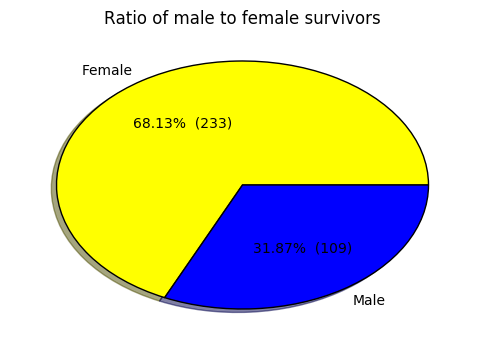

In [92]:
male_female_survivors = survivors.groupby('Sex')['Survived'].count()

labels = 'Female', 'Male'
colors = ['yellow', 'blue']
plt.title('Ratio of male to female survivors')
plt.pie(male_female_survivors, labels = labels, colors = colors, autopct=make_autopct(male_female_survivors), shadow=True)
plt.show()

### 4.1.2 Ratio of male survivors vs male deaths

In [75]:
males = titanic_data_pandas[titanic_data_pandas['Sex'] == 'M']
male_survivors_vs_deaths = males.groupby('Survived')['Sex'].count()

Survived
False    468
True     109
Name: Sex, dtype: int64


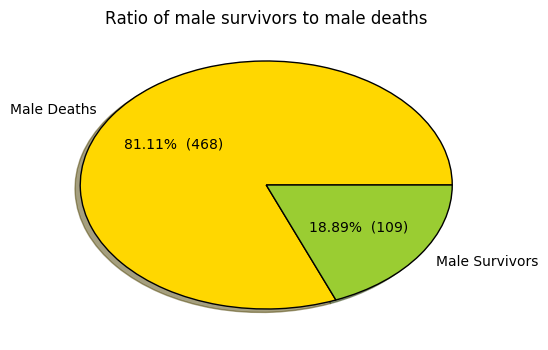

In [94]:
labels_male = 'Male Deaths', 'Male Survivors'
colors_male = ['gold', 'yellowgreen']
plt.title('Ratio of male survivors to male deaths')
plt.pie(male_survivors_vs_deaths, labels = labels_male, colors = colors_male, autopct=make_autopct(male_survivors_vs_deaths), shadow=True)
plt.show()

### 4.1.3 Ratio of female survivors vs female deaths

In [80]:
females = titanic_data_pandas[titanic_data_pandas['Sex'] == 'F']
female_survivors_vs_deaths = females.groupby('Survived')['Sex'].count()

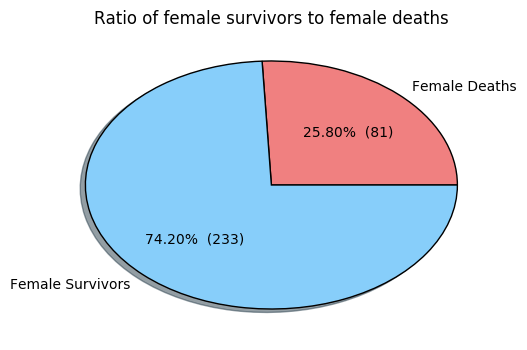

In [93]:
labels_male = 'Female Deaths', 'Female Survivors'
colors_male = ['lightcoral', 'lightskyblue']
plt.title('Ratio of female survivors to female deaths')
plt.pie(female_survivors_vs_deaths, labels = labels_male, colors = colors_male, autopct=make_autopct(female_survivors_vs_deaths), shadow=True)
plt.show()

### Observation:

From the graph 1.1, we can clearly see that out of all the survivors, 64.8% of them are women, and only 35.2% of them are men. Also, the total number of female survivors (233) is significantly greater than the total number of male survivors (109). This indicates that "women first" philosophy was greatly followed in the titanic ship.

Graphs 1.2 and 1.3 strengthen our argument. From 1.2 we can see that 81.1% of the total males died in the titanic havoc and only 18.9% survived. Where as 74.20% of women survived and only 25.80% of them died. 

Thus we can conclude that the survival rate of female passengers is significantly greater than that of male passengers

## 4.2 Which class of passengers have a better survival rate?

### 4.2.1 Survival ratio's of first, second and third class passengers

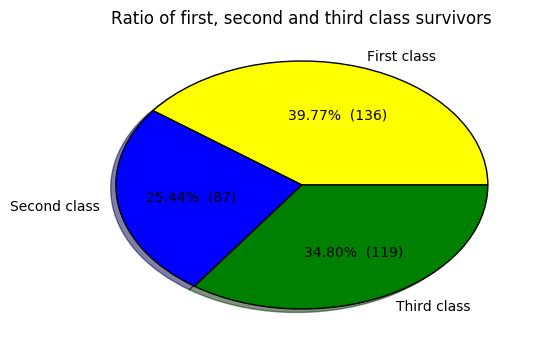

In [101]:
first_second_third_class_survivors = survivors.groupby('Pclass')['Survived'].count()

labels = 'First class', 'Second class', 'Third class'
colors = ['yellow', 'blue', 'Green']
plt.title('Ratio of first, second and third class survivors')
plt.pie(first_second_third_class_survivors, labels = labels, colors = colors, shadow=True, 
        autopct = make_autopct(first_second_third_class_survivors))
plt.show()

### 4.2.2 Survival and Death Plots by class 

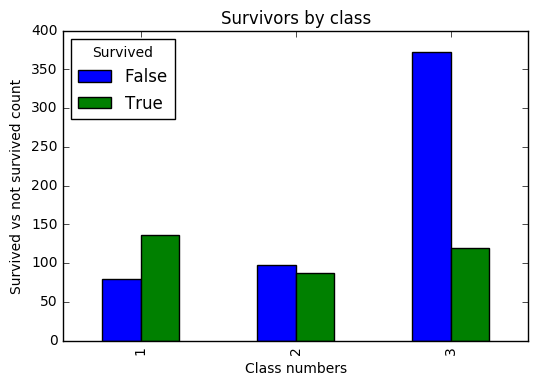

In [10]:
each_class_survivors = titanic_data_pandas.groupby(['Survived', 'Pclass']).size().unstack('Survived').fillna(False)

each_class_survivors[[0, 1]].plot(kind='bar')
plt.title('Survivors by class')
plt.xlabel('Class numbers')
plt.ylabel('Survived vs not survived count')
plt.show()

### Observation:

From the graph 4.2.2, we can see that the number of deaths is the highest in third class, and lowest in first class. It is possible that first class is the costlier class and has higher privileges in terms of safety of the ship, and so the death rate on the first class is the lowest. Where as, the number of deaths keep increasing with second and third classes indicating that second class is relatively cheaper when compared to first class, and third class is relatively cheaper compared to second class.

## 4.3 How is the survival rate impacted by the age of the passengers?

### 4.3.1 Survival rate by age group

/home/ravi/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


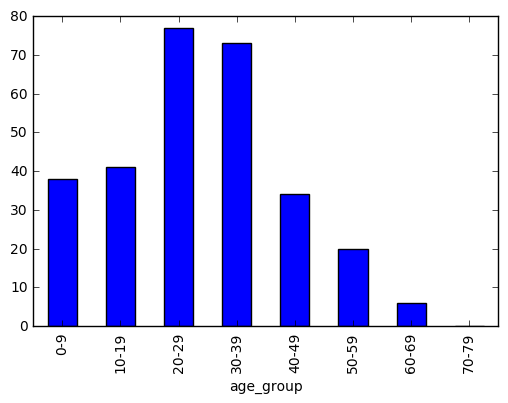

In [150]:
survival_rate_by_age = survivors[survivors['Age'].notnull()]

age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
survival_rate_by_age['age_group'] = pd.cut(survival_rate_by_age.Age, range(0, 81, 10), right=False, labels=age_labels)

survival_rate_by_age.groupby(['age_group']).size().plot(kind='bar',stacked=True)
plt.show()


### 4.3.2 Death rate by Age group

/home/ravi/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


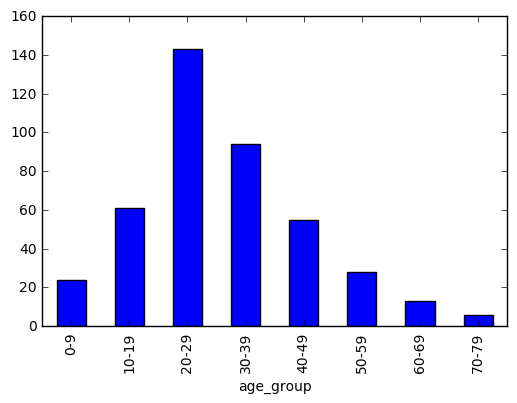

In [151]:
death_rate_by_age = deaths[deaths['Age'].notnull()]

age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
death_rate_by_age['age_group'] = pd.cut(death_rate_by_age.Age, range(0, 81, 10), right=False, labels=age_labels)

death_rate_by_age.groupby(['age_group']).size().plot(kind='bar',stacked=True)
plt.show()

### Observation:

From the above graphs we can clearly see that Age groups 0-9 and 70-79 has the least number of death indicating that 'Children' had higher chances of survival. We can also see that Age groups 20-29 has the highest number of survivors - which is quite evident as the people of this age are a little stronger than the other age groups where as highest number of deaths in the age group 20-29 might suggest that they might have died while protecting the elders and children.

# 5. Conclusion

## 5.1 Limitations

The provided data is not complete. There are null values in the 'Age' data which if provided could lead to a better analysis. The 'Survived' column also has invalid data for which I had to write the code to make 'na' values to false.

Also, the data set provided us is limited in size, and our analysis results could vary if the actual data set was provided.